In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
from mpl_toolkits import mplot3d

# Lab2

## Zad1

In [2]:
lambda_par = 1
miedzyczasy = np.random.exponential(scale = lambda_par, size = int(1e2))
skoki = [0]

for i in range(int(1e2)):
    skoki.append(skoki[i]+miedzyczasy[i])
    
t = np.arange(0, max(skoki), 0.01)
Nt = [0] * len(t)

j = 1
for i in range(len(t)-1):
    if(t[i+1]>=skoki[j]):
        Nt[i+1] = Nt[i] + 1
        j += 1
    else:
        Nt[i+1] = Nt[i]

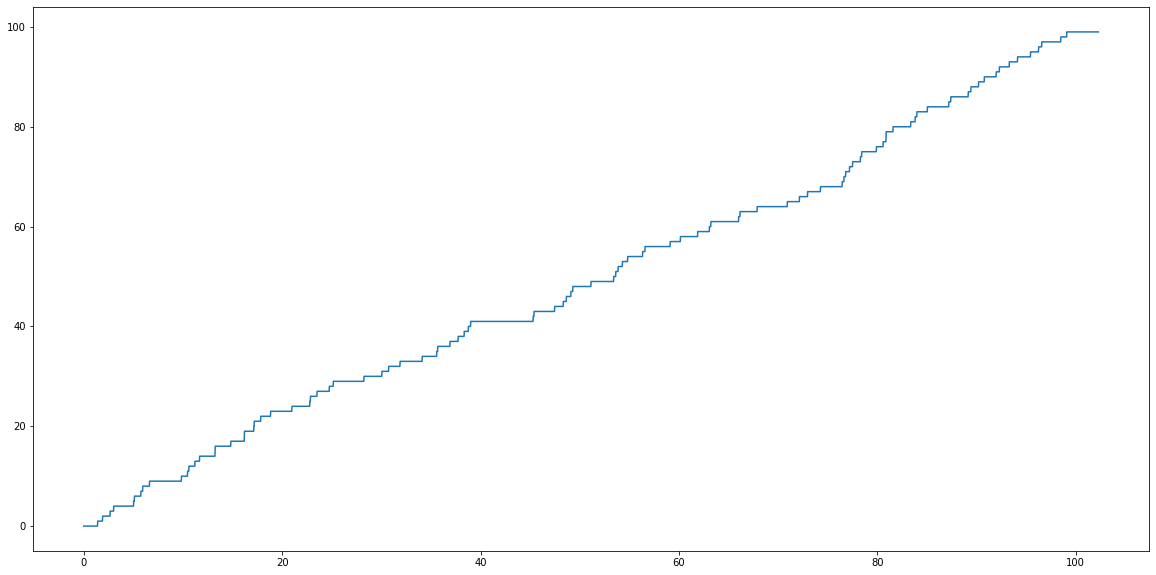

In [3]:
plt.figure(figsize=(20,10))
plt.plot(t, Nt)

## Zad2

### Sposób pierwszy

In [85]:
Wt = [0]
l = 100000
Z = np.random.normal(size = l)
t = range(l)

for i in range(l - 1):
    Wt.append(Wt[i] + math.sqrt(t[i+1] - t[i])*Z[i])

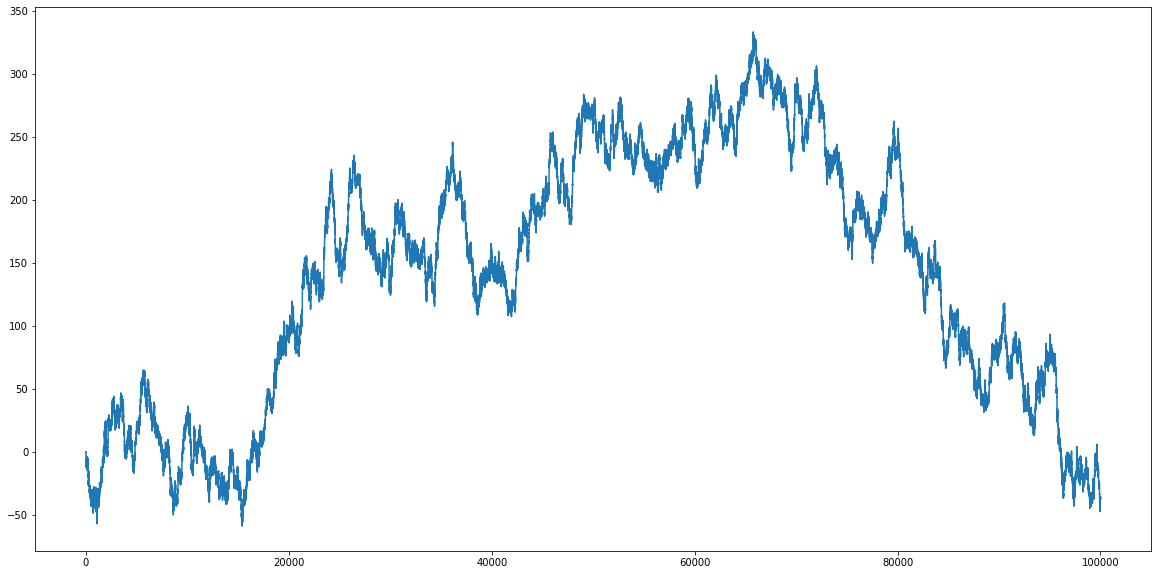

In [60]:
plt.figure(figsize=(20,10))
plt.plot(t, Wt)


### Sposób drugi

In [83]:
l = 100
Z = np.random.normal(size = l)
E = [[0.0] * l for i in range(l)]
t = np.arange(1,l+1,1)

for i in range(l):
    for j in range(l):
        E[i][j] = min(t[i], t[j])

from math import sqrt
def cholesky(S):  
    n = len(S)
    L = [[0.0] * n for i in range(n)]
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            if (i == k):
                L[i][k] = sqrt(S[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (S[i][k] - tmp_sum))
    return L

Wt = np.array(cholesky(E)).dot(Z)

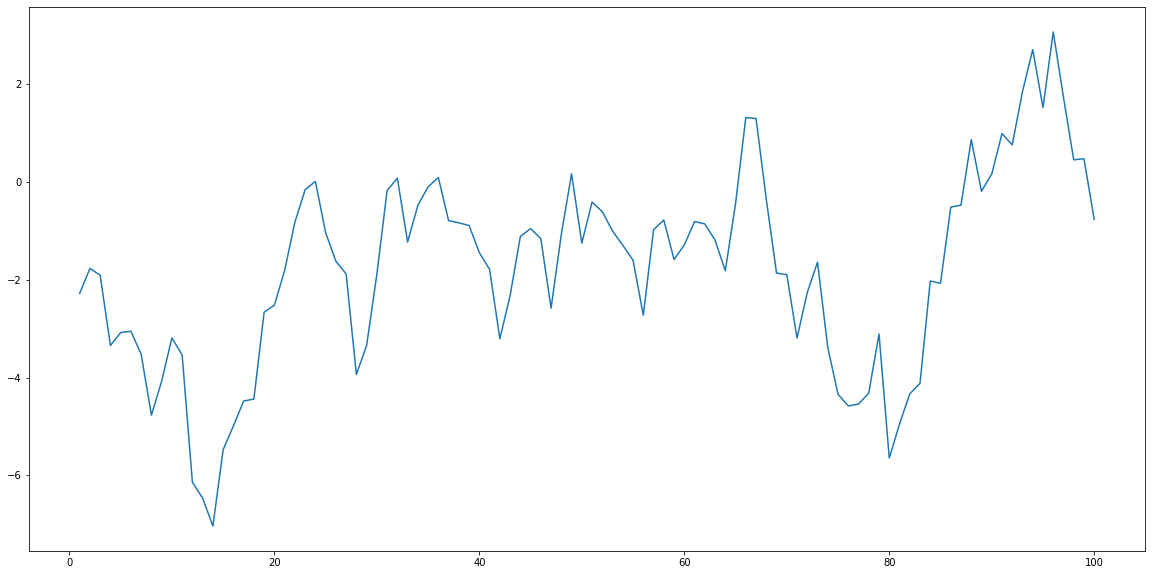

In [84]:
plt.figure(figsize=(20,10))
plt.plot(t, Wt)

### Porównanie czasu

In [89]:
start = time.time()
Wt = [0]
l = 100
Z = np.random.normal(size = l)
t = range(l)

for i in range(l - 1):
    Wt.append(Wt[i] + math.sqrt(t[i+1] - t[i])*Z[i])
end = time.time()
Pierwszy = end - start
Pierwszy

0.0009703636169433594

In [90]:
start = time.time()

Z = np.random.normal(size = l)
Wt = np.array(cholesky(E)).dot(Z)
end = time.time()
Drugi = end - start
Drugi

0.09873485565185547

## Zad3


Text(0.5, 0, 'Wt2')

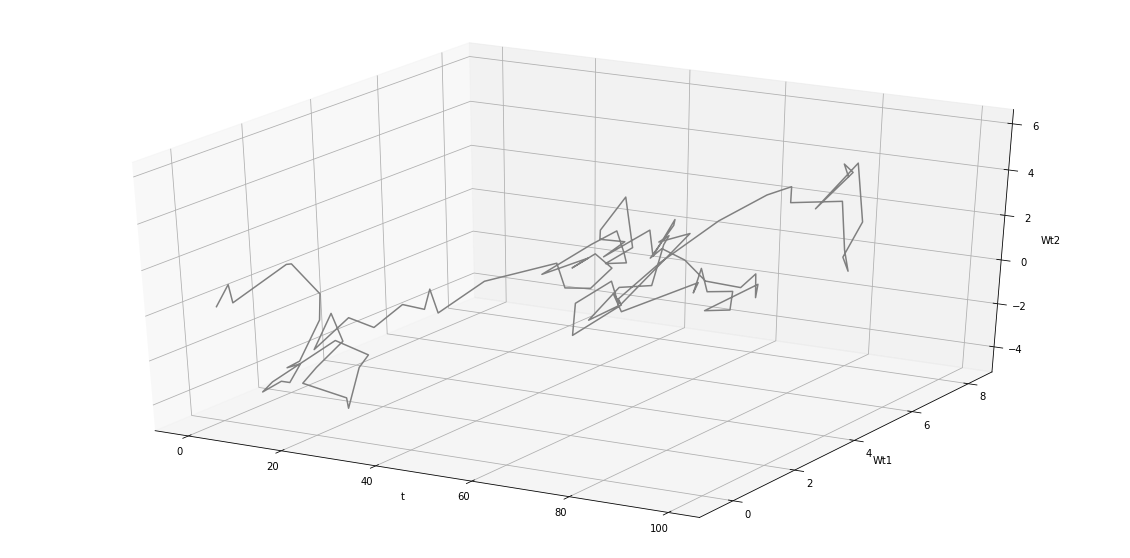

In [7]:
l = 100
t = range(l)

Wt1 = [0]
Z1 = np.random.normal(size = l)
Wt2 = [0]
Z2 = np.random.normal(size = l)

for i in range(l - 1):
    Wt1.append(Wt1[i] + math.sqrt(t[i+1] - t[i])*Z1[i])
    Wt2.append(Wt2[i] + math.sqrt(t[i+1] - t[i])*Z2[i])
plt.figure(figsize=(20,10))    
ax = plt.axes(projection='3d')
ax.plot3D(t, Wt1, Wt2, 'gray')
ax.set_xlabel('t')
ax.set_ylabel('Wt1')
ax.set_zlabel('Wt2')

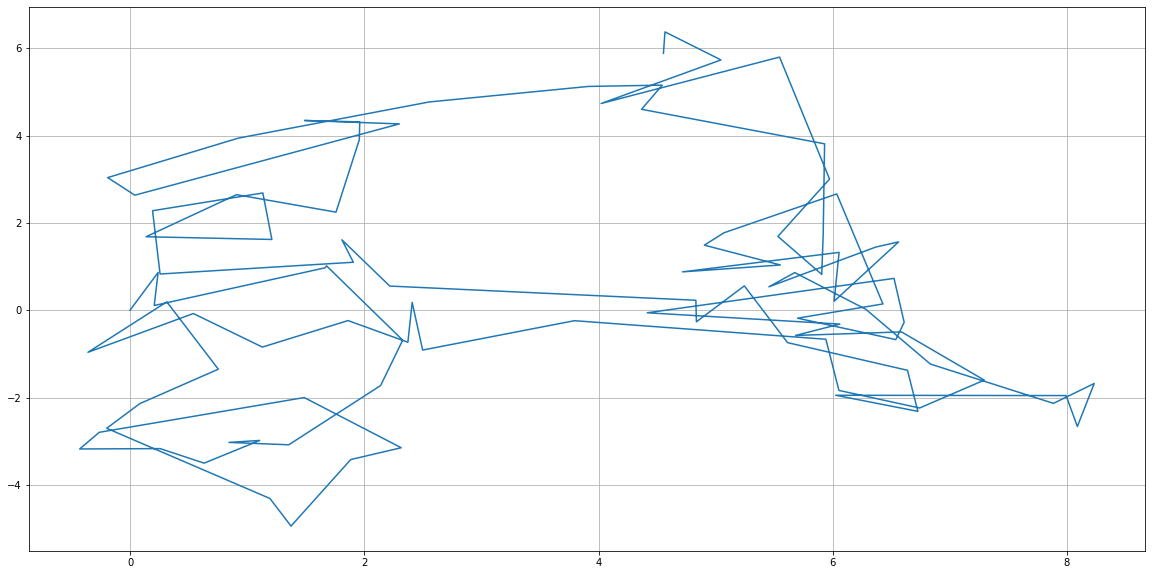

In [9]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(Wt1, Wt2)

## Zad4

Text(0.5, 0, 'Wt2')

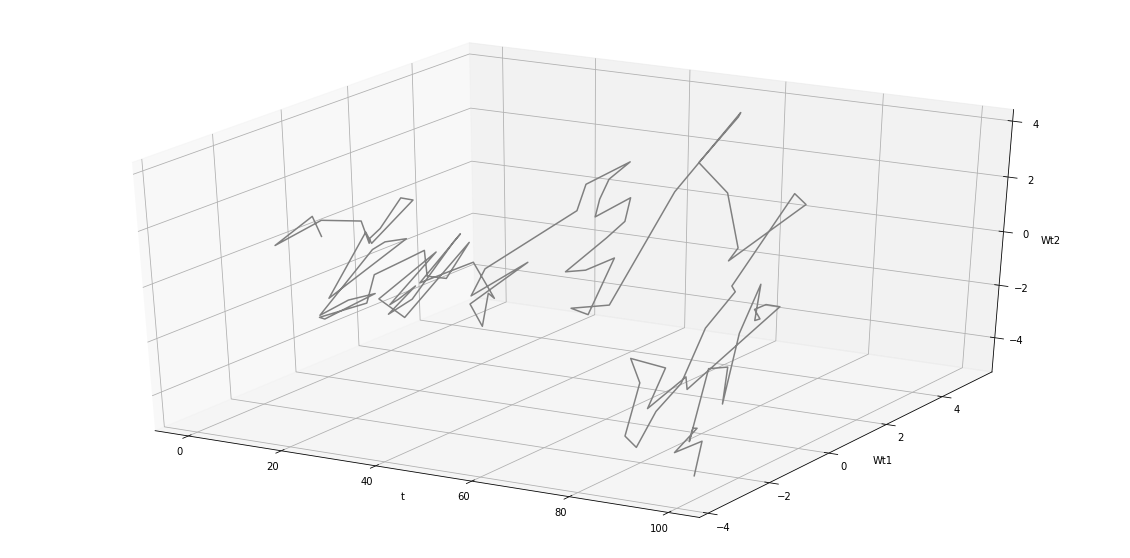

In [10]:
l = 100
t = range(l)

Wt1 = [0]
Z1 = np.random.normal(size = l)
Wt2 = [0]
Z2 = np.random.normal(size = l)
ro = 0.5

for i in range(l - 1):
    Wt1.append(Wt1[i] + math.sqrt(t[i+1] - t[i])*Z1[i])
    Wt2.append(Wt2[i] + math.sqrt(t[i+1] - t[i])*Z2[i])
Wt1 = np.array(Wt1)
Wt2 = np.array(Wt2)   
Vt1 = Wt1
Vt2 = ro*Wt1 + math.sqrt(1-ro**2)*Wt2

plt.figure(figsize=(20,10))    
ax = plt.axes(projection='3d')
ax.plot3D(t, Vt1, Vt2, 'gray')
ax.set_xlabel('t')
ax.set_ylabel('Wt1')
ax.set_zlabel('Wt2')

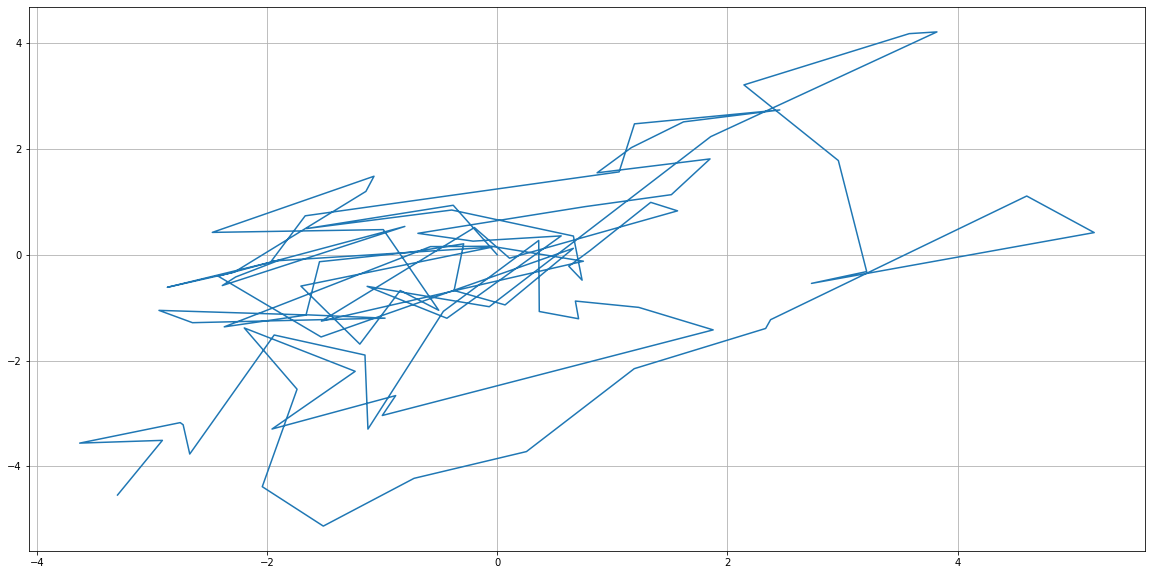

In [11]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(Vt1, Vt2)

## Zad5

In [20]:
l = int(1e5)
t = np.arange(3,l+3,1)

list_of_wt = []
for j in range(100):
    Wt = [0]
    Z = np.random.normal(size = l)
    for i in range(l - 1):
           Wt.append(Wt[i] + math.sqrt(t[i+1] - t[i])*Z[i])
    list_of_wt.append(Wt)

In [16]:
f1 = [math.sqrt(2*x*math.log(math.log(x))) for x in t]
f2 = [-math.sqrt(2*x*math.log(math.log(x))) for x in t]

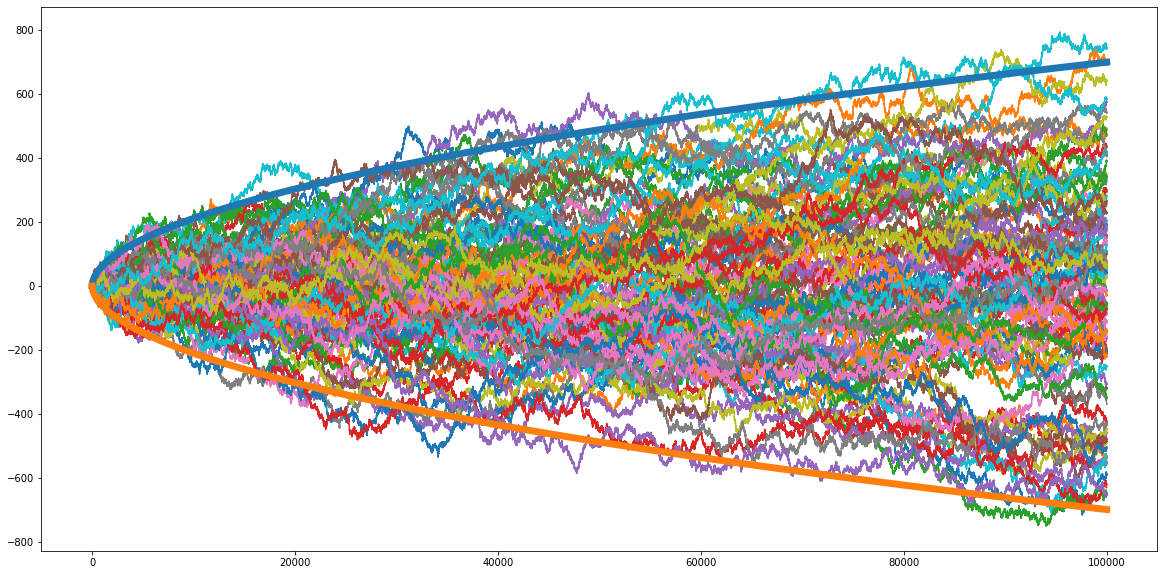

In [21]:
plt.figure(figsize=(20,10))
for Wt in list_of_wt:
    plt.plot(t, Wt)
plt.plot(t, f1,linewidth=7)
plt.plot(t, f2,linewidth=7)
plt.show()